In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc


import uproot 
import awkward as ak
import pickle

In [2]:
file = "/home/dejavu/Projects/qgcal/Training/dijet_sample_newBDT_flatten.npy"
all_jets = np.load(file)
all_jets[:, 0] = all_jets[:, 0]/1e3

all_jets.shape # Flatten events, need to reshape to split 
# leading, subleading
# forward, central


(72778406, 9)

In [5]:
def split_jet_type(jets):
    gluon_idx = np.where(jets[:,6]==21)[0]
    light_quark_idx = np.where((jets[:,6]==1) | (jets[:,6]==2)| (jets[:,6]==3))[0]
    c_quark_idx = np.where(jets[:,6]==4)[0]
    b_quark_idx = np.where(jets[:,6]==5)[0]
    data_idx = np.where(jets[:,6]==-9999)[0]
    others_idx = np.where(jets[:,6]==-1)[0]

    gluon = jets[gluon_idx]
    quark = jets[light_quark_idx]
    c_quark = jets[c_quark_idx]
    b_quark = jets[b_quark_idx]
    data = jets[data_idx]
    others = jets[others_idx]

    return [gluon, quark, c_quark, b_quark, data, others]

In [3]:
label_pt_bin = [500, 600, 800, 1000, 1200, 1500, 2000]
def split_jet_pt(jets):
    splited_jet_pt = {}
    for i, pt_start in enumerate(label_pt_bin[:-1]):
        pt_selected_idx = np.where((jets[:,0] >= pt_start) & (jets[:,0] < label_pt_bin[i+1]))[0]
        splited_jet_pt[pt_start] = jets[pt_selected_idx]

    return splited_jet_pt

In [4]:
splited_jet_pt = split_jet_pt(all_jets)

In [6]:
quark_1500 = split_jet_type(splited_jet_pt[1500])[1]
quark_500 = split_jet_type(splited_jet_pt[500])[1]


[]

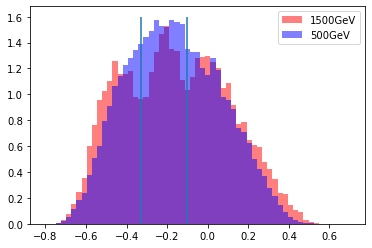

In [22]:
bdt_axis = np.linspace(-0.8, 0.7, 60 )
fig, ax = plt.subplots()
ax.hist(quark_1500[:,8], weights=quark_1500[:,7], bins = bdt_axis, density = True, alpha=0.5, color="red", label="1500GeV")
ax.hist(quark_500[:,8], weights=quark_500[:,7], bins = bdt_axis, density = True, alpha=0.5, color="blue", label="500GeV")
ax.vlines(x = -0.33, ymin = 0, ymax=1.6)
ax.vlines(x = -0.1, ymin = 0, ymax=1.6)
ax.legend()
ax.plot()

In [20]:
user_range = [(500, 2000), (-3, 3), (0, 100), (-0.1, 0.4), (-0.1, 0.5), (-1.0, 1.0)]
user_xlabel = ["Jet $p_{\mathrm{T}}$ [GeV]", "$\eta$", "Number of tracks", "$W_{jet}$", "$C_1$", "BDT Score"]
user_filename = ["dis_jetpt", "dis_eta", "dis_ntracks", "dis_width", "dis_c1", "dis_bdt"]

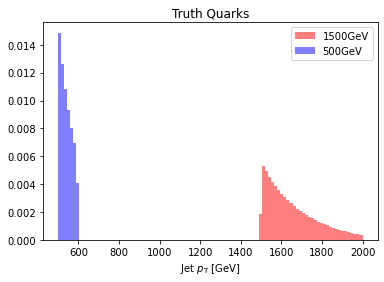

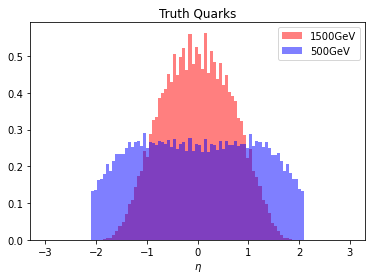

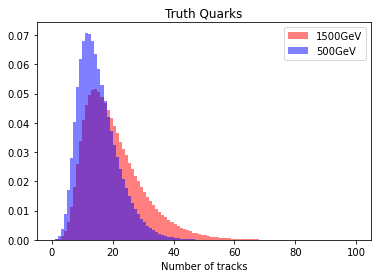

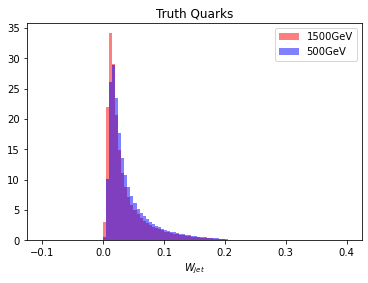

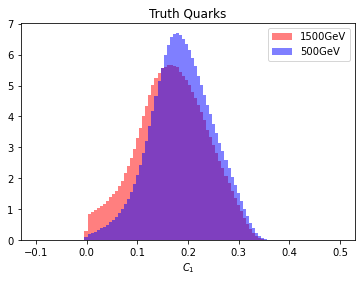

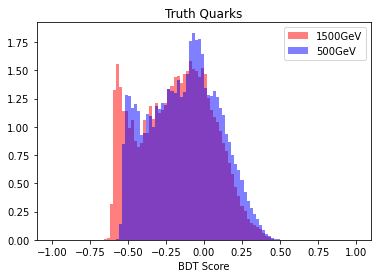

In [27]:
for i in range(6):

    fig, ax = plt.subplots()
    user_bins = np.linspace(user_range[i][0], user_range[i][1], 101)
    ax.hist(quark_1500[:,i], weights = quark_1500[:,7], bins = user_bins,
            density= True, alpha=0.5, label="1500GeV", color = "red")
    ax.hist(quark_500[:,i], weights = quark_500[:,7], bins = user_bins,
            density= True, alpha=0.5, label="500GeV", color = "blue")

    ax.legend()
    ax.set_xlabel(user_xlabel[i])
    ax.set_title("Truth Quarks")
    ax.plot()




In [25]:
len(quark_1500)

3646832

In [26]:
len(quark_500)

9456547

In [28]:
gluon_1500 = split_jet_type(splited_jet_pt[1500])[0]
gluon_500 = split_jet_type(splited_jet_pt[500])[0]


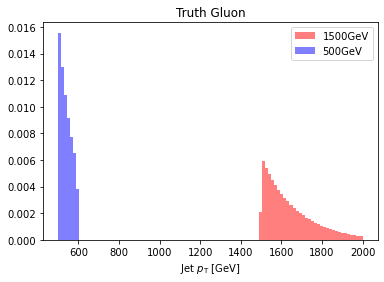

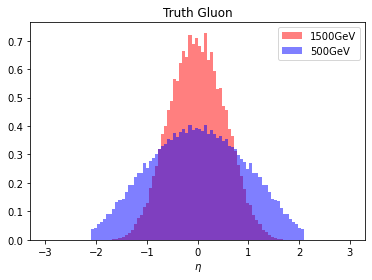

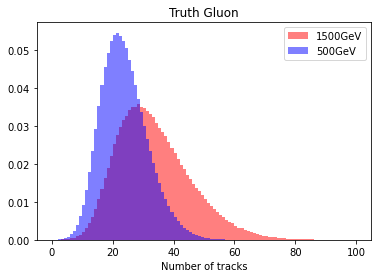

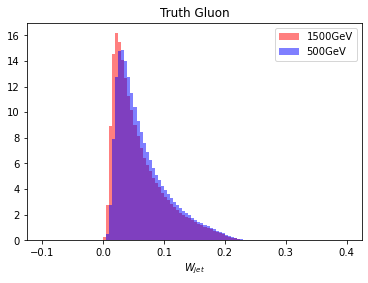

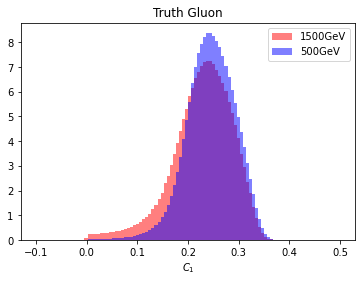

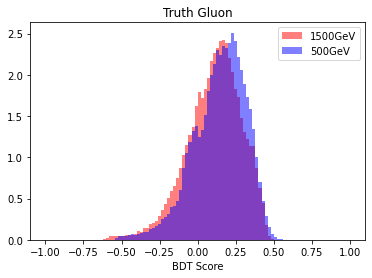

In [29]:
for i in range(6):

    fig, ax = plt.subplots()
    user_bins = np.linspace(user_range[i][0], user_range[i][1], 101)
    ax.hist(gluon_1500[:,i], weights = gluon_1500[:,7], bins = user_bins,
            density= True, alpha=0.5, label="1500GeV", color = "red")
    ax.hist(gluon_500[:,i], weights = gluon_500[:,7], bins = user_bins,
            density= True, alpha=0.5, label="500GeV", color = "blue")

    ax.legend()
    ax.set_xlabel(user_xlabel[i])
    ax.set_title("Truth Gluon")
    ax.plot()


